### Clustering

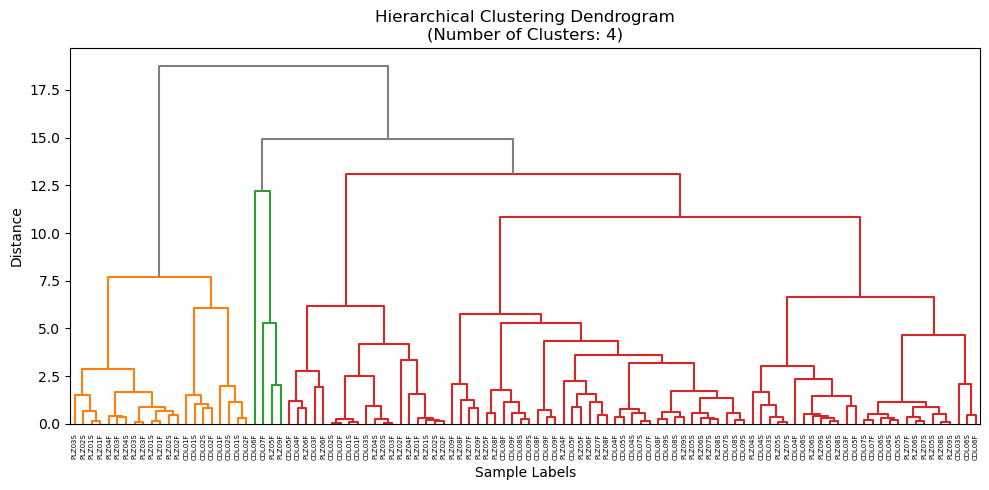

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # estandariza variables (media 0, desviación 1)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # funciones de SciPy para clustering jerárquico


# Read in the data from the csv file
data = pd.read_csv("Course_data.csv")

def preprocess_data(df, variables):
    """
    Standardize selected variables and return clean DataFrame.
    """
    df_clean = df.dropna(subset=variables) # elimina cualquier fila que tenga NaN en alguna de las variables seleccionadas.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    # Devuelve:
    # df_clean: el DataFrame filtrado (sin nulos en esas columnas).
    # X_scaled: matriz NumPy estandarizada (solo las columnas de variables), lista para clusterizar.
    return df_clean, X_scaled
############### Clustering jerárquico ###############
def perform_hierarchical_clustering(X_scaled, method='ward', n_clusters=4):
    """
    Perform hierarchical clustering and return cluster labels.
    Con method='ward' el algoritmo busca minimizar la varianza intra-clúster en cada fusión.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

############### Dendrograma ###############
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    """
    Plot a dendrogram from the hierarchical clustering with sample labels.
    Annotate the plot with the number of clusters.
    """
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        above_threshold_color='gray'  # Default color for links above the threshold
    )
    #plt.axhline(y=color_threshold, linestyle='--')
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(data, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 4,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=4)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

* Método Ward = Utiliza el aumento de las varianzas
* Método Complete = Utiliza la distancia máxima entre puntos. Sensible a puntos muy alejados
* Método Average = Utliliza el promedio entre puntos.